In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling

chromo = pd.read_excel('GSE114559_SuppTable7-Gene-Expression-Table.xlsx')

#remove rows with zeros
clean_chromo = chromo[chromo!=0].dropna()

#remove duplicate genes
clean_chromo = clean_chromo.drop_duplicates(subset ="gene", 
                     keep = False, inplace = False) 

#transpose the dataset
clean_transposed = clean_chromo.T

#add new index and remove old transposed index
clean_transposed.reset_index(inplace=True)
clean_transposed.drop("index",axis=1,inplace=True)

clean_transposed.columns = clean_transposed.iloc[0]

#create copy with gene descriptions on it
clean_transposed_descriptions = clean_transposed[0:2]

#labels scraped from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi 
labels = ["Normal",
"Normal",
"Normal",
"Normal",
"Normal",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Trisomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy",
"Monosomy"]


#remove rows 0 & 1 and add class to the dataset

clean_transposed = clean_transposed.drop([clean_transposed.index[0] , clean_transposed.index[1]])
clean_transposed['class'] = labels

#keep record of all classes before working with just normal and trisomy 
clean_transposed_all = clean_transposed

In [2]:
#Change class labels to binary 
clean_transposed_all = clean_transposed_all.replace('Normal',0)
clean_transposed_all = clean_transposed_all.replace('Monosomy',0)
clean_transposed_all = clean_transposed_all.replace('Trisomy',1)

In [3]:
clean_transposed_all['class'].value_counts()

1    53
0    48
Name: class, dtype: int64

In [4]:
#Bring in the modelling dependancies
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

In [5]:
#clean_transposed_all

In [6]:
#Split the new dataset and create new training and test data
features = clean_transposed_all.iloc[:,:-1]
result = clean_transposed_all.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 14)

In [7]:
#random forest first
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Making predictions on unseen data
predictions_rf = rf.predict(X_test)

#test random forest validity
print(classification_report(y_test, predictions_rf))
print(confusion_matrix(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.67      0.67      0.67        12

    accuracy                           0.62        21
   macro avg       0.61      0.61      0.61        21
weighted avg       0.62      0.62      0.62        21

[[5 4]
 [4 8]]


/Users/titti/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
#pick out the best features
a =list(zip(features, rf.feature_importances_))

In [9]:
#build list of features to use in model

columns_to_use = []
for list in a:
    if list[1]>0:
        print(list)
        columns_to_use.append(list[0])
        
    
    
    

('ALKBH7', 0.0045601688951442615)
('AP2A1', 0.020290574544083423)
('ARL6', 0.017065060543321412)
('ASB16-AS1', 0.0036060401171963048)
('ATAD2B', 0.012067340067340063)
('ATP2A2', 0.0305318607644189)
('ATP5G2', 0.003809523809523809)
('ATP6AP1', 0.006095238095238095)
('B4GALT4', 0.020322432608523015)
('CCNA2', 0.03725713427336945)
('CDC42EP1', 0.009034913700228105)
('CDC45', 0.03040094503509138)
('COA5', 0.010484595635430041)
('COQ6', 0.012548118468051591)
('CTDNEP1', 0.051336140863668125)
('DCLRE1C', 0.003999999999999999)
('DCXR', 0.004897959183673469)
('DDIT4L', 0.00473684210526316)
('DNAJC5', 0.009000157502756302)
('ELL2', 0.029214815239405407)
('EXOSC7', 0.004753416518122402)
('EXT2', 0.006611073548193227)
('FBXW11', 0.004875911852656035)
('FOXP4', 0.004848484848484845)
('FRMD4A', 0.004208754208754209)
('GSE1', 0.004950086626515961)
('HECA', 0.010101010101010102)
('HNRNPA2B1', 0.013020227853987442)
('HNRNPKP4', 0.009481481481481483)
('HSPA5', 0.019306184012066362)
('KIFAP3', 0.0128620

In [10]:
#now produce a dataset from the useful columns
reduced_clean_transposed_all = clean_transposed_all[columns_to_use]
labels = clean_transposed_all['class']
reduced_clean_transposed_all = reduced_clean_transposed_all.join(labels)


In [11]:
#Split reduced dataset 
Logfeatures = reduced_clean_transposed_all.iloc[:,:-1]
Logresult = reduced_clean_transposed_all.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(Logfeatures, Logresult, test_size = 0.2, random_state = 14)

In [12]:
#normalise the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [13]:
#Manual MLP classifyer

clf = MLPClassifier(solver='lbfgs', alpha=1e-05,hidden_layer_sizes=(80,80), max_iter=2,random_state=1)

In [14]:
clf.fit(X_train_std,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80, 80), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
#MLP with grid search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['lbfgs'], 'max_iter': [100,200,300,400],  
              'hidden_layer_sizes':[(70,80),(80,80),(90,80)],
              'momentum':[0.4,0.5,0.6,0.7,0.8,0.9],
              'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train_std, y_train)
print(clf.score(X_train_std, y_train))
print(clf.best_params_)


/Users/titti/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


1.0
{'hidden_layer_sizes': (70, 80), 'max_iter': 100, 'momentum': 0.4, 'random_state': 7, 'solver': 'lbfgs'}


/Users/titti/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
predictions = clf.predict(X_test_std)

In [17]:
predictions = clf.predict(X_test_std)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.80      0.67      0.73        12

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.73      0.71      0.72        21

[[7 2]
 [4 8]]


No Skill: ROC AUC=0.500
MLP: ROC AUC=0.769


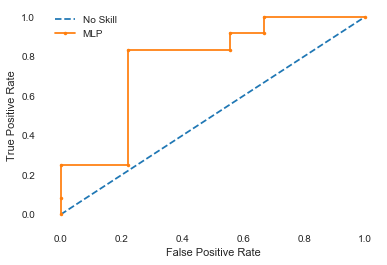

In [18]:
#ROC curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = clf.predict_proba(X_test_std)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()